In [1]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
import seaborn as sns
from nltk.corpus import stopwords 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")


In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.drop(['negativereason','negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'],axis=1,inplace=True)

In [5]:
data.dropna(inplace=True)

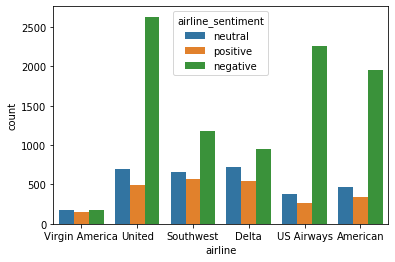

In [6]:
sns.countplot(x='airline', hue="airline_sentiment", data=data)


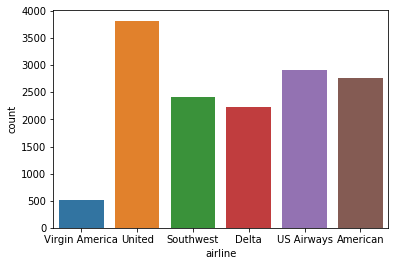

In [7]:
sns.countplot(x='airline', data=data)

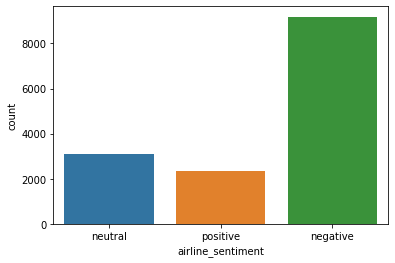

In [8]:
import seaborn as sns
sns.countplot(x='airline_sentiment', data=data)

In [9]:
sentiment_text = data.text
target_label = data.airline_sentiment

In [10]:
processed_tweets = []
for tweet in range(0, len(sentiment_text)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(sentiment_text[tweet]))
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    processed_tweets.append(processed_tweet)

In [11]:
len(processed_tweets)

14640

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
sentiment_text = tfidfconverter.fit_transform(processed_tweets).toarray()

In [13]:
def convert(target):
    if target == 'neutral':
        return 0
    elif target == 'positive':
        return 1
    else :
        return -1

In [14]:
target_label = target_label.apply(convert)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_text, target_label, test_size=0.2, random_state=256)

In [22]:
from sklearn.ensemble import RandomForestClassifier
GNB = RandomForestClassifier()  
GNB.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
predictions = GNB.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,predictions)  


array([[1734,   85,   45],
       [ 327,  237,   58],
       [ 129,   52,  261]], dtype=int64)

In [25]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n          -1       0.79      0.93      0.86      1864\n           0       0.63      0.38      0.48       622\n           1       0.72      0.59      0.65       442\n\n    accuracy                           0.76      2928\n   macro avg       0.71      0.63      0.66      2928\nweighted avg       0.75      0.76      0.74      2928\n'

In [26]:
accuracy_score(y_test, predictions)

0.7622950819672131